##### PREDICTING PRICE OF AIRBNB HOTEL ROOMS

## Import libraries

In [4]:
# data manuipulation
import numpy as np
import pandas as pd

# modeling utilities
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer

# plotting libraries
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
import missingno as msno
from plotly import express as px
from plotly import graph_objects as go
#from geopy.distance import geodesic

from scipy import stats
from math import sqrt

import calendar
from datetime import datetime

import warnings

# Plotting parameters tuning
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

##### Load and preview airbnb listing data

In [5]:
dataset = pd.read_csv("Dublin_Airbnb.csv")
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.28995,-6.25813,Private room,50,3,225,2020-02-17,2.07,3,302
1,85148,Habitación en Dublín Double room,466111,Don,NaN,South Dublin,53.30110,-6.31992,Private room,30,1,1,2019-05-11,0.10,1,118
2,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29178,-6.25618,Private room,50,3,180,2020-02-25,1.69,3,307
3,121030,Comfy double room in central area 1,608225,Norah,NaN,Dublin City,53.33648,-6.22075,Private room,55,2,110,2019-03-19,1.04,3,26
4,159889,Friendly Single Room,766611,Margaret,NaN,Dublin City,53.39027,-6.23547,Private room,29,2,311,2020-02-09,3.22,3,309


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9259 entries, 0 to 9258
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              9259 non-null   int64  
 1   name                            9258 non-null   object 
 2   host_id                         9259 non-null   int64  
 3   host_name                       9259 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   9259 non-null   object 
 6   latitude                        9259 non-null   float64
 7   longitude                       9259 non-null   float64
 8   room_type                       9259 non-null   object 
 9   price                           9259 non-null   int64  
 10  minimum_nights                  9259 non-null   int64  
 11  number_of_reviews               9259 non-null   int64  
 12  last_review                     77

In [7]:
dataset.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [8]:
description = ['Will be excluded','Categorical','Numerical','Will be excluded','Will be excluded','Categorical',
               'Numerical','Numerical','Categorical','Numerical','Numerical','Numerical',
               'Will be excluded','Numerical','Numerical','Numerical']

In [9]:
dataset.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [10]:
new_df = pd.DataFrame({'Attribute': dataset.columns,'Data Type' : dataset.dtypes,'Description' : description})
new_df

,Attribute,Data Type,Description
id,id,int64,Will be excluded
name,name,object,Categorical
host_id,host_id,int64,Numerical
host_name,host_name,object,Will be excluded
neighbourhood_group,neighbourhood_group,float64,Will be excluded
neighbourhood,neighbourhood,object,Categorical
latitude,latitude,float64,Numerical
longitude,longitude,float64,Numerical
room_type,room_type,object,Categorical
price,price,int64,Numerical


#### Understanding, Wrangling and Cleaning Data

In [11]:
#Check for missing values
dataset.isnull().sum().value_counts


<bound method IndexOpsMixin.value_counts of id                                   0
name                                 1
host_id                              0
host_name                            0
neighbourhood_group               9259
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1479
reviews_per_month                 1479
calculated_host_listings_count       0
availability_365                     0
dtype: int64>

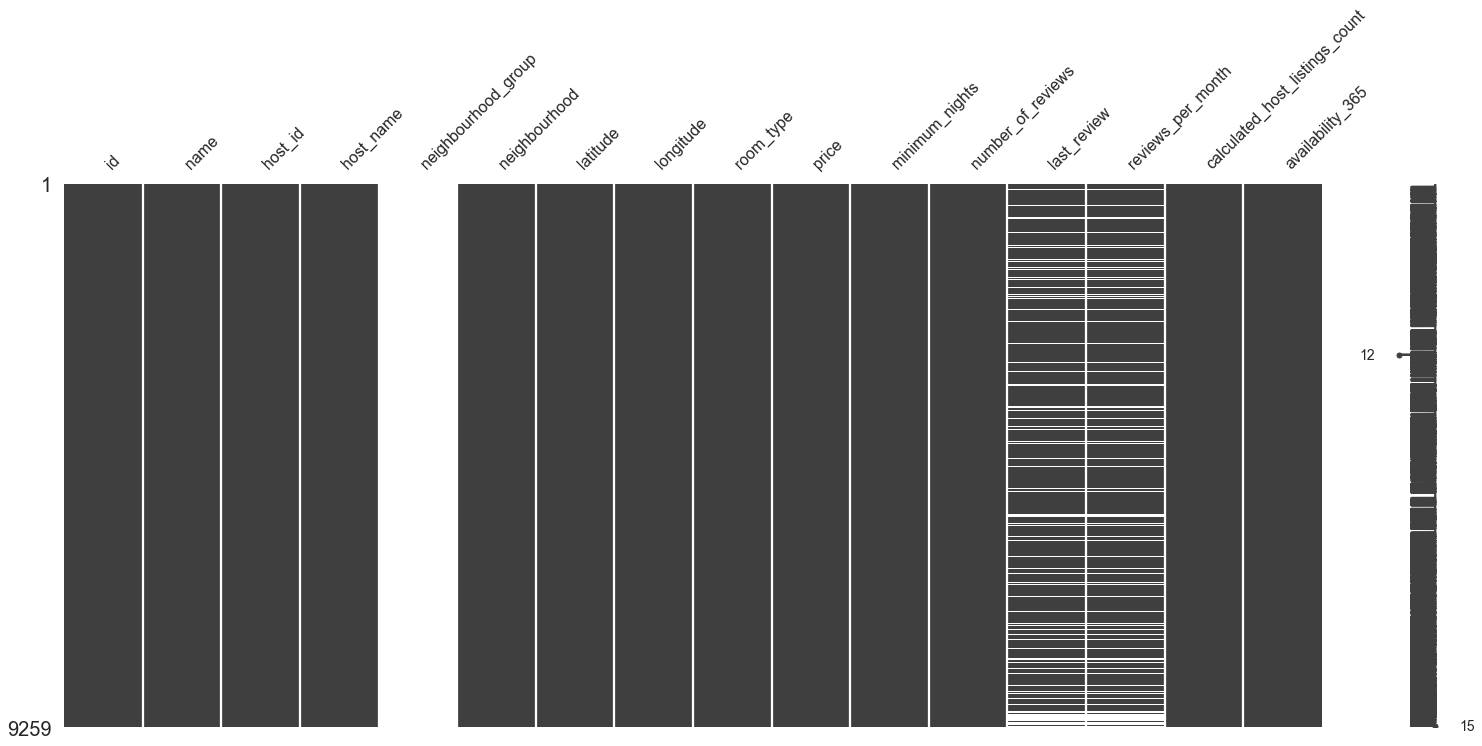

In [12]:
msno.matrix(dataset)

In [13]:
tmp = dataset.copy()

In [15]:
tmp = tmp[~tmp['name'].isnull()] # deleting the row containing the NaN in the column 'name'

In [16]:
#dropping insignificant columns having missing values or which are not relevant for our prediction and exploration
tmp = tmp.drop(['neighbourhood_group', 'last_review','id'], axis=1)

In [17]:
tmp.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

### Imputaion

In [18]:
imputer = SimpleImputer(strategy = 'mean')
tmp['reviews_per_month'].values.reshape(-1,1)
tmp['reviews_per_month'] = imputer.fit_transform(tmp['reviews_per_month'].values.reshape(-1,1))
tmp['reviews_per_month']

0       2.070000
1       0.100000
2       1.690000
3       1.040000
4       3.220000
          ...   
9254    1.756307
9255    1.756307
9256    1.756307
9257    1.756307
9258    1.756307
Name: reviews_per_month, Length: 9258, dtype: float64

In [19]:
tmp.isnull().sum().value_counts

<bound method IndexOpsMixin.value_counts of name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64>

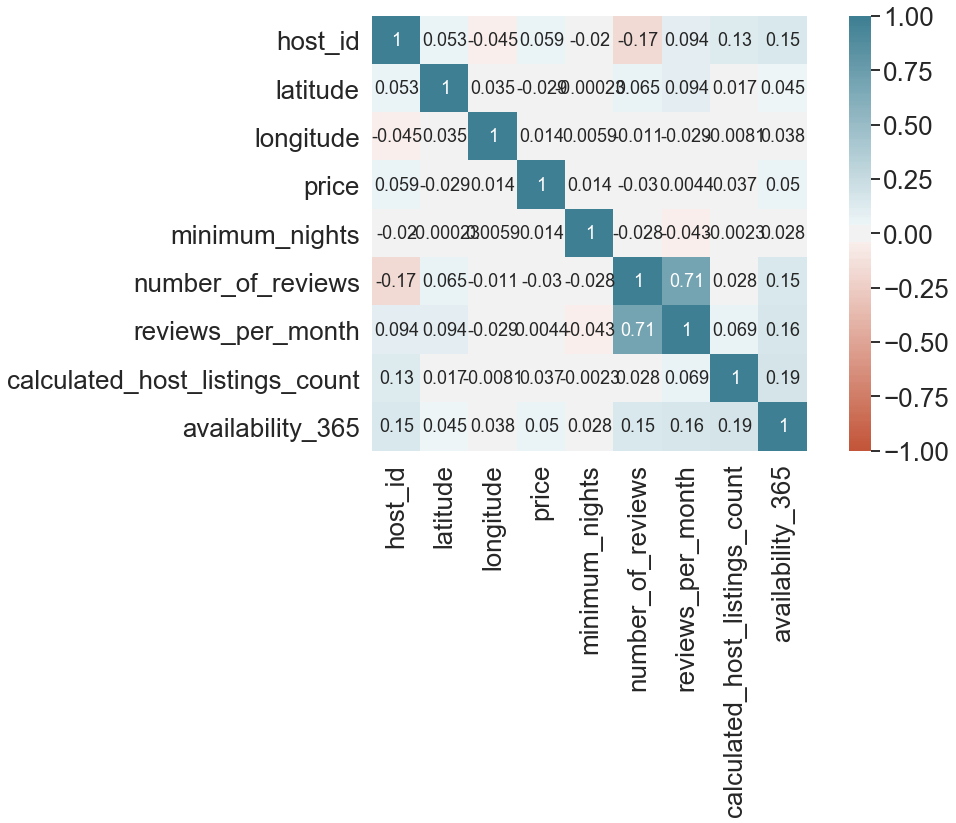

In [20]:
# Correlation Matrix
plt.figure(figsize=(15,8))
c= tmp.corr()
sns.heatmap(c,annot=True,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

In [21]:
hist_Columns = list(i for i in tmp.select_dtypes([np.number]).columns if i in ['price','availability_365',
                        'minimum_nights','reviews_per_month'])

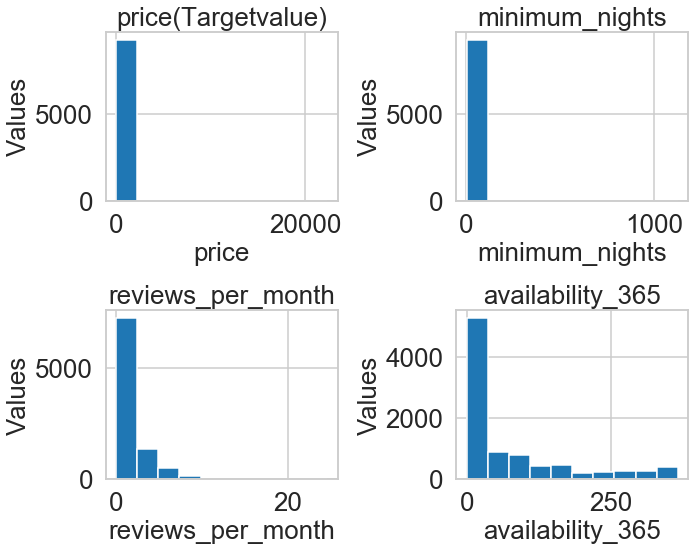

In [22]:
#Unbalanced Distribution
count=0
fig, axs = plt.subplots(2, 2, tight_layout=True,figsize=(10,8)) 
#plt.figure(figsize=(20,10))
for i in range(2):
    for j in range(2):
        if(hist_Columns[count]=='price'):
            axs[i,j].hist(tmp[hist_Columns[count]])
            axs[i,j].set(title = hist_Columns[count]+'(Targetvalue)', xlabel= hist_Columns[count],ylabel='Values')
            count+=1
        else:
            axs[i,j].hist(tmp[hist_Columns[count]])
            axs[i,j].set(title = hist_Columns[count], xlabel= hist_Columns[count],ylabel='Values')
            count+=1

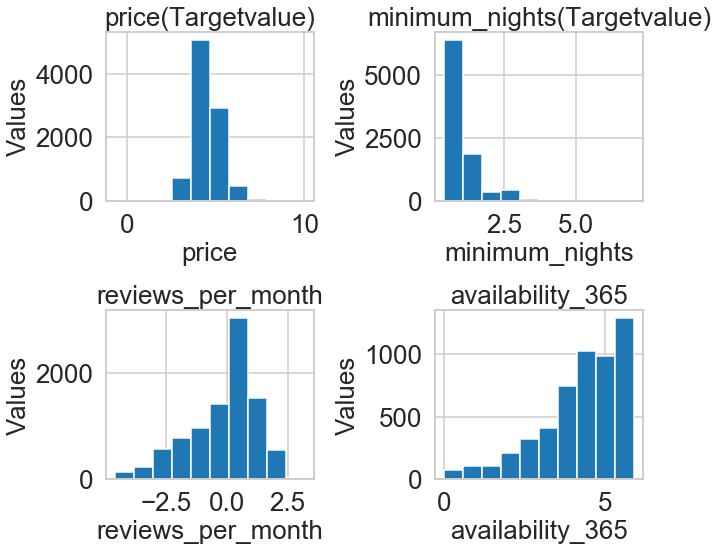

In [70]:
#Balanced Distribution
count=0
fig, axs = plt.subplots(2, 2, tight_layout=True,figsize=(10,8)) 
#plt.figure(figsize=(20,10))
for i in range(2):
    for j in range(2):
        if((hist_Columns[count]=='price') or (hist_Columns[count]=='minimum_nights')):
            axs[i,j].hist(np.log(tmp[hist_Columns[count]]+0.5))
            axs[i,j].set(title = hist_Columns[count]+'(Targetvalue)', xlabel= hist_Columns[count],ylabel='Values')
            count+=1
        else:
            axs[i,j].hist(np.log(tmp[tmp[hist_Columns[count]]!=0][hist_Columns[count]]))
            axs[i,j].set(title = hist_Columns[count], xlabel= hist_Columns[count],ylabel='Values')
            count+=1

C:\Users\badol\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning:

divide by zero encountered in log



Text(0.5, 1.0, 'Boxplot to detect outliers for Price')

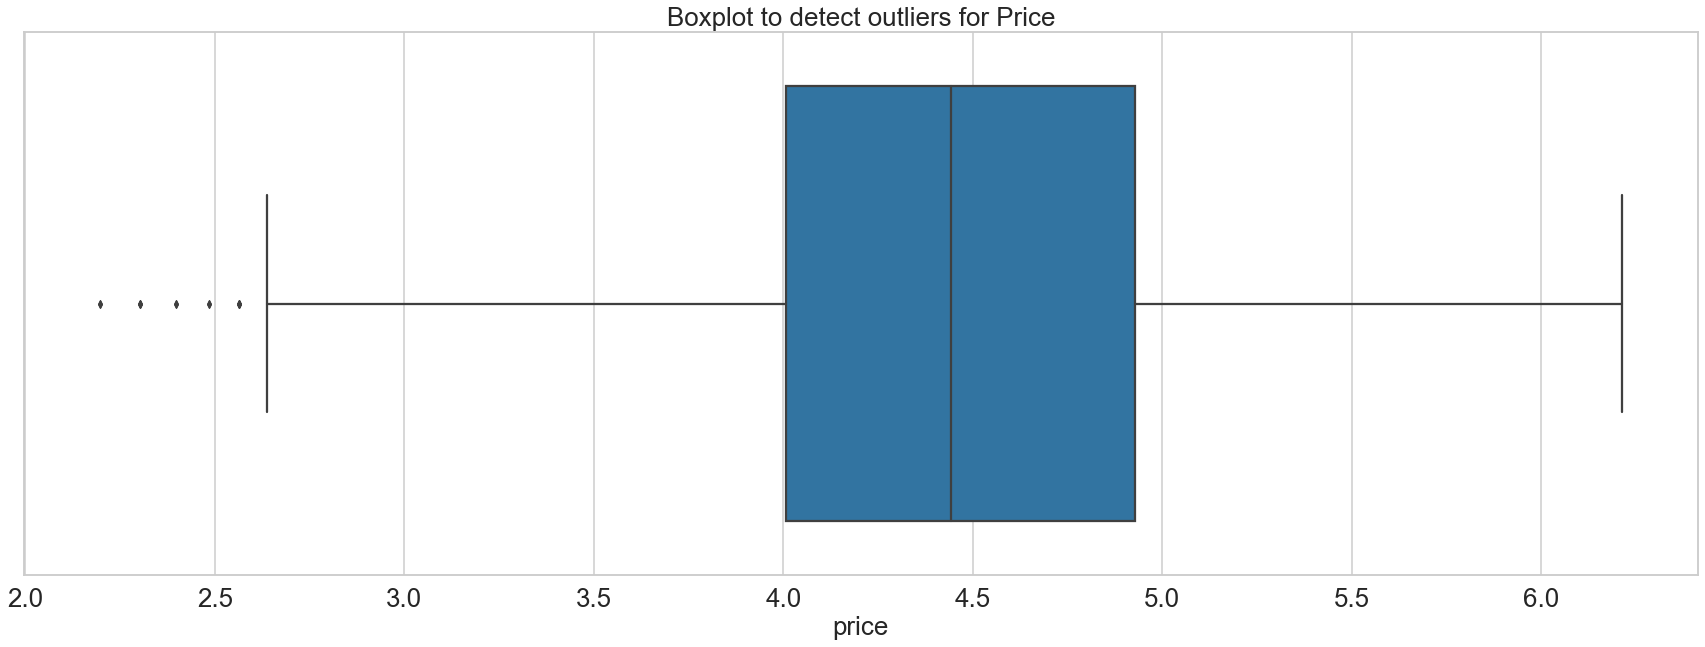

In [23]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
#taking prices less than 500 inorder to reduce outliers
sub_6=tmp[tmp.price < 500]
# Fit your data on the scaler object
#scaler.fit_transform(tmp['visibility'].values.reshape(-1,1))
sns.boxplot(x=np.log(sub_6['price']) ).set_title("Boxplot to detect outliers for Price")
#box.set( color='#7570b3', linewidth=2)
#box.set( facecolor = '#1b9e77' )

In [24]:
#Showing the normalisation of all the factors
#Normalised Data
hist_Columns = list(i for i in sub_6.select_dtypes([np.number]).columns if i not in ['price', 'log_price','host_id','latitude','longitude'])
hist_Columns

['minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [25]:
#Checking the skeweness of the continous variable
tmp_int_float = sub_6.drop(['price','log_price'], axis = 1)

skew_feats = tmp_int_float.skew().sort_values(ascending= False)
skewness= pd.DataFrame({'Skew':skew_feats})
skewness

KeyError: "['log_price'] not found in axis"

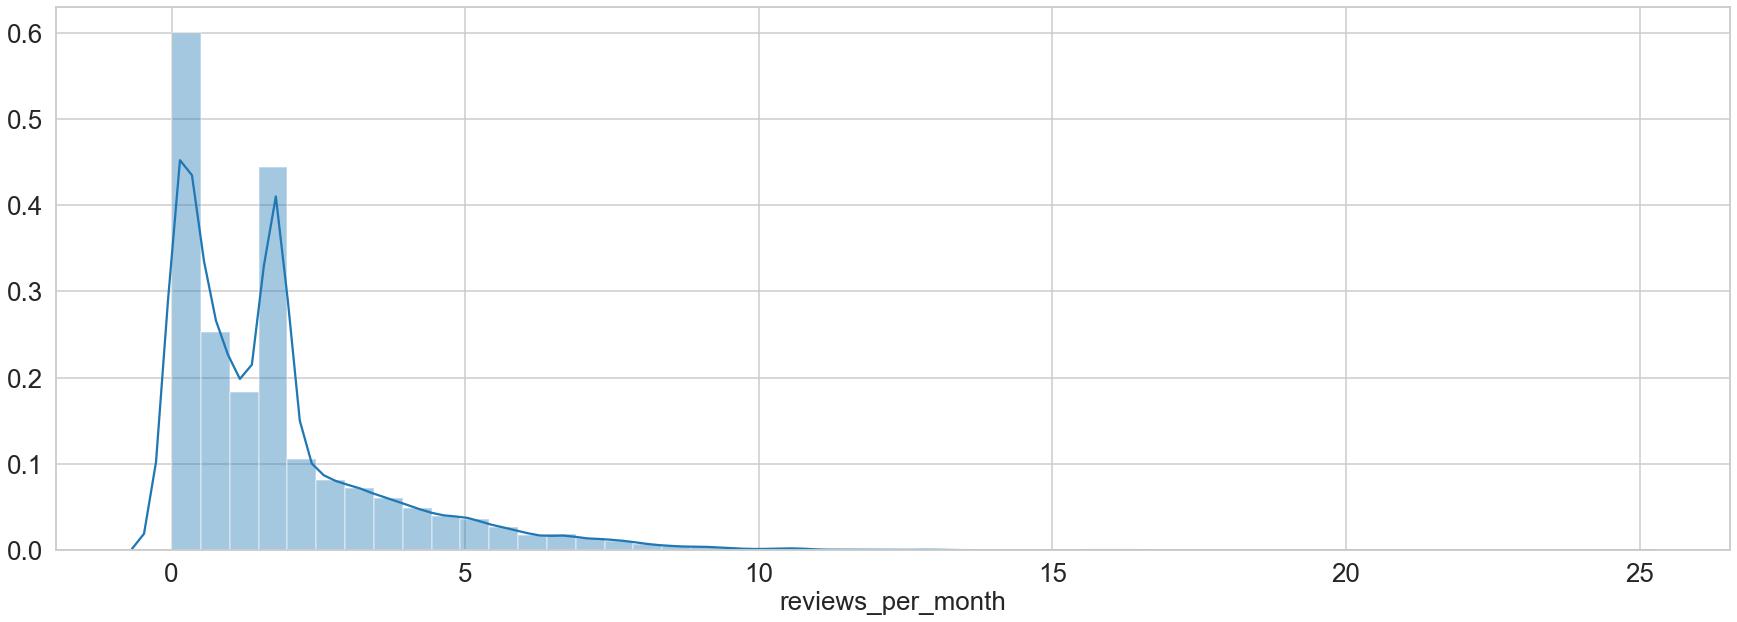

In [26]:
sns.distplot(sub_6.reviews_per_month)

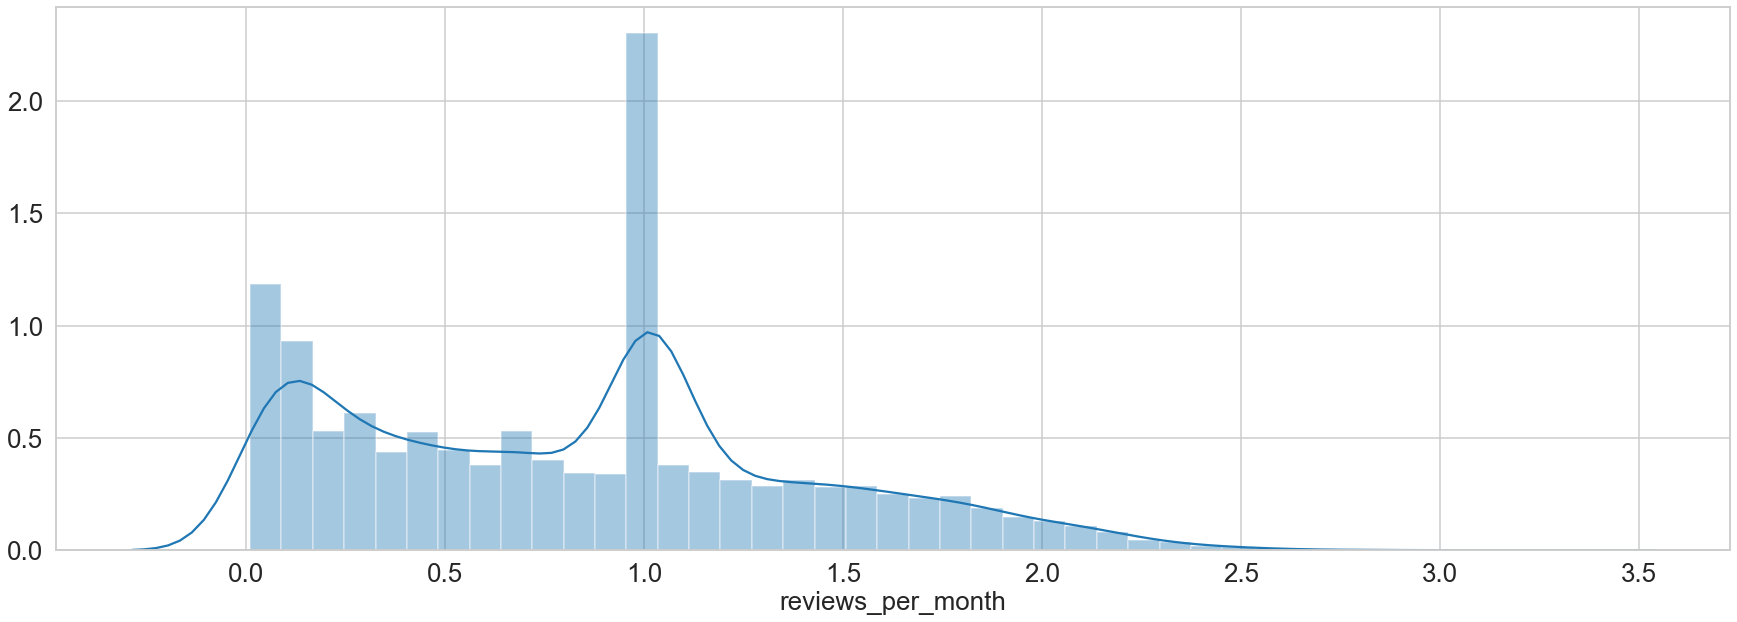

In [27]:
#log transformation
log_review_pm = np.log(sub_6.reviews_per_month+1)
sns.distplot(log_review_pm)

In [28]:
sub_6['log_review_pm']=log_review_pm
sub_6

C:\Users\badol\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,log_review_pm
0,cosy comfortable Irish cottage twin,193005,Teresa,Dn Laoghaire-Rathdown,53.289950,-6.258130,Private room,50,3,225,2.070000,3,302,1.121678
1,Habitación en Dublín Double room,466111,Don,South Dublin,53.301100,-6.319920,Private room,30,1,1,0.100000,1,118,0.095310
2,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,Dn Laoghaire-Rathdown,53.291780,-6.256180,Private room,50,3,180,1.690000,3,307,0.989541
3,Comfy double room in central area 1,608225,Norah,Dublin City,53.336480,-6.220750,Private room,55,2,110,1.040000,3,26,0.712950
4,Friendly Single Room,766611,Margaret,Dublin City,53.390270,-6.235470,Private room,29,2,311,3.220000,3,309,1.439835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9254,Calm place. direct bus to Airport. 10min to town,187709087,Asif,Dublin City,53.309600,-6.290500,Private room,40,2,0,1.756307,1,358,1.013892
9255,Room in charming Victorian residence Dublin Ci...,18466080,Tony,Dublin City,53.361323,-6.259660,Private room,45,1,0,1.756307,3,8,1.013892
9256,Trinity & Docklands One-Bedroom Apartment,339155896,Michael,Dublin City,53.345329,-6.248456,Entire home/apt,89,1,0,1.756307,1,4,1.013892
9257,Cosy King in Central Dublin,338500002,Marlin Hotel,Dublin City,53.339294,-6.263792,Private room,289,1,0,1.756307,1,363,1.013892


In [29]:
#Check interesting categorical values
sub_6.neighbourhood.unique()

array(['Dn Laoghaire-Rathdown', 'South Dublin', 'Dublin City', 'Fingal'],
      dtype=object)

In [30]:
sub_6.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [31]:
sub_6.name.unique()

array(['cosy comfortable Irish cottage twin',
       'Habitación en Dublín Double room',
       'Cosy Comfortable Irish Cottage  1 Double Bed', ...,
       'Trinity & Docklands One-Bedroom Apartment',
       'Cosy King in Central Dublin',
       'Entire apartment in the heart of Dublin'], dtype=object)

In [32]:
#### Exploring and Visualising Data

In [33]:
#Check the top hosts
top_host=sub_6.host_id.value_counts().head(10)
top_host

31284582     57
160402201    44
264806441    34
202961997    29
162402361    27
244298639    26
228862428    26
70154490     24
185902621    21
152937423    21
Name: host_id, dtype: int64

In [34]:
#confirming our finding with already existing column called calculated_host_listings_count
top_host_check=sub_6.calculated_host_listings_count.max()
top_host_check

57

[Text(0, 0, '31284582'),
 Text(0, 0, '160402201'),
 Text(0, 0, '264806441'),
 Text(0, 0, '202961997'),
 Text(0, 0, '162402361'),
 Text(0, 0, '244298639'),
 Text(0, 0, '228862428'),
 Text(0, 0, '70154490'),
 Text(0, 0, '185902621'),
 Text(0, 0, '152937423')]

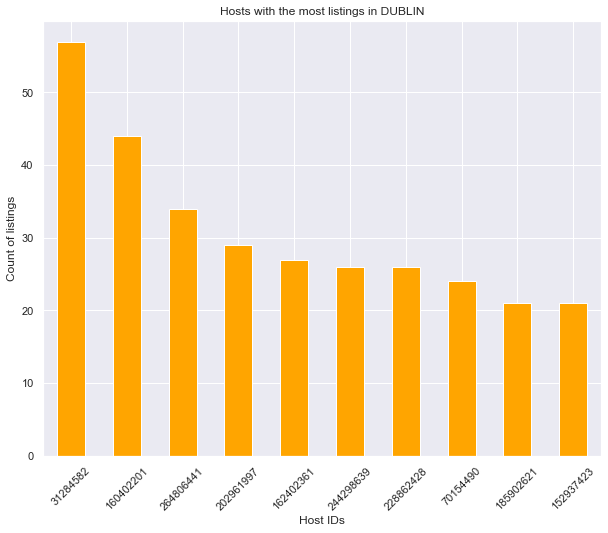

In [35]:
#hosts with most listing in dublin
sns.set(rc={'figure.figsize':(10,8)})
viz_1=top_host.plot(kind='bar', color ='orange')
viz_1.set_title('Hosts with the most listings in DUBLIN')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

In [36]:
#finding out top neighbourhoods
sub_6.neighbourhood.value_counts().head(10)

Dublin City              6829
Dn Laoghaire-Rathdown     975
Fingal                    807
South Dublin              364
Name: neighbourhood, dtype: int64

In [37]:
sub_6

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,log_review_pm
0,cosy comfortable Irish cottage twin,193005,Teresa,Dn Laoghaire-Rathdown,53.289950,-6.258130,Private room,50,3,225,2.070000,3,302,1.121678
1,Habitación en Dublín Double room,466111,Don,South Dublin,53.301100,-6.319920,Private room,30,1,1,0.100000,1,118,0.095310
2,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,Dn Laoghaire-Rathdown,53.291780,-6.256180,Private room,50,3,180,1.690000,3,307,0.989541
3,Comfy double room in central area 1,608225,Norah,Dublin City,53.336480,-6.220750,Private room,55,2,110,1.040000,3,26,0.712950
4,Friendly Single Room,766611,Margaret,Dublin City,53.390270,-6.235470,Private room,29,2,311,3.220000,3,309,1.439835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9254,Calm place. direct bus to Airport. 10min to town,187709087,Asif,Dublin City,53.309600,-6.290500,Private room,40,2,0,1.756307,1,358,1.013892
9255,Room in charming Victorian residence Dublin Ci...,18466080,Tony,Dublin City,53.361323,-6.259660,Private room,45,1,0,1.756307,3,8,1.013892
9256,Trinity & Docklands One-Bedroom Apartment,339155896,Michael,Dublin City,53.345329,-6.248456,Entire home/apt,89,1,0,1.756307,1,4,1.013892
9257,Cosy King in Central Dublin,338500002,Marlin Hotel,Dublin City,53.339294,-6.263792,Private room,289,1,0,1.756307,1,363,1.013892


Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood')

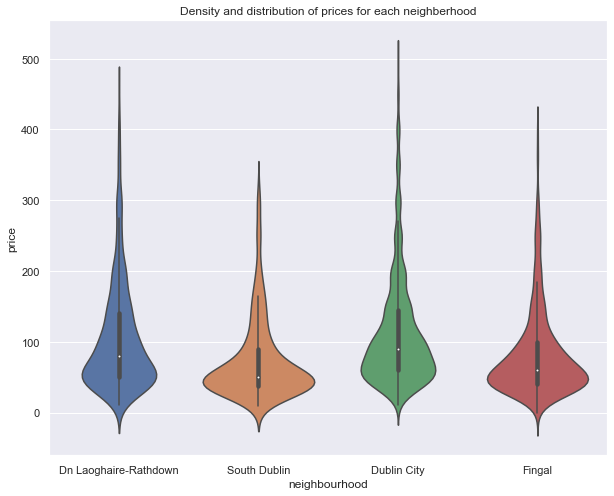

In [38]:
#Distribution of price for each neighbourhood
#sub_6=tmp[tmp.price < 500] # we will not take any extreme values
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub_6, x='neighbourhood', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood')

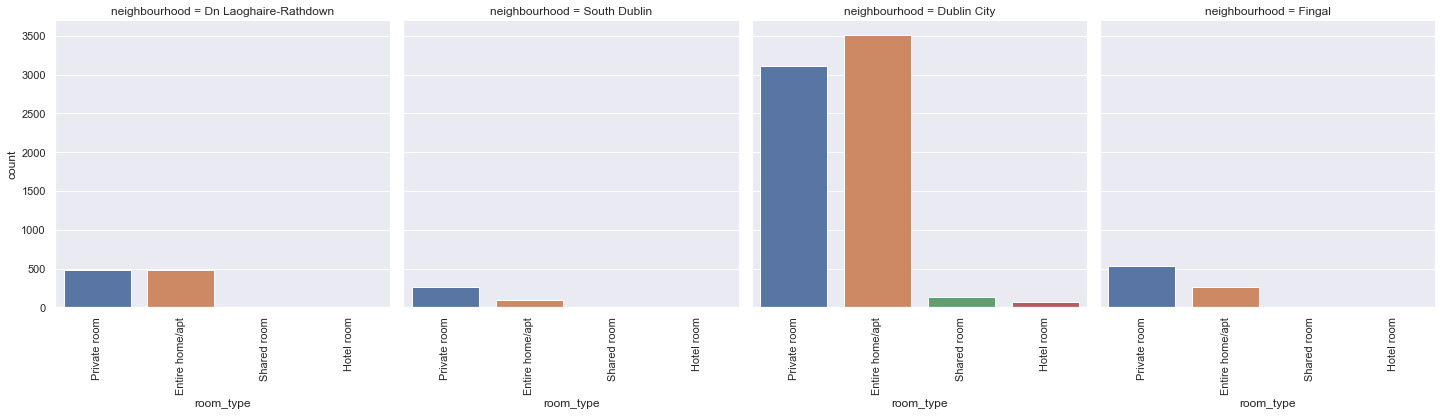

In [39]:
#grabbing top neighbourhoods on room type basis 
sub_7=sub_6.loc[tmp['room_type'].isin(['Entire home/apt','Private room','Shared room','Hotel room'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='room_type', col='neighbourhood', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

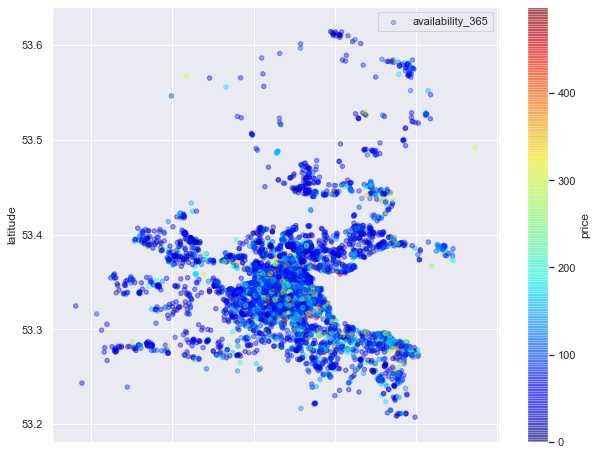

In [40]:
#longtitude and latitude columns showing availability basis price
viz_4=sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

In [41]:
#Working with the name column

_names_=[]
#getting name strings from the column and appending it to the list
for name in sub_6.name:
    _names_.append(name)
#setting a function that will split those name strings into separate words   
def split_name(name):
    spl=str(name).split()
    return spl
#initializing empty list where we are going to have words counted
_names_for_count_=[]
#getting name string from our list and using split function, later appending to list above
for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)

In [42]:
from collections import Counter
#let's see top 25 used words by host to name their listing
_top_25_w=Counter(_names_for_count_).most_common()
_top_25_w=_top_25_w[0:25]

In [43]:
#now let's put our findings in dataframe for further visualizations
sub_w=pd.DataFrame(_top_25_w)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)

[Text(0, 0, 'in'),
 Text(0, 0, 'city'),
 Text(0, 0, 'room'),
 Text(0, 0, 'dublin'),
 Text(0, 0, 'double'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'centre'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'the'),
 Text(0, 0, 'to'),
 Text(0, 0, 'home'),
 Text(0, 0, 'house'),
 Text(0, 0, 'bed'),
 Text(0, 0, '-'),
 Text(0, 0, 'with'),
 Text(0, 0, 'private'),
 Text(0, 0, '2'),
 Text(0, 0, 'cosy'),
 Text(0, 0, 'of'),
 Text(0, 0, 'modern'),
 Text(0, 0, 'near'),
 Text(0, 0, '&'),
 Text(0, 0, 'and'),
 Text(0, 0, 'spacious'),
 Text(0, 0, 'close')]

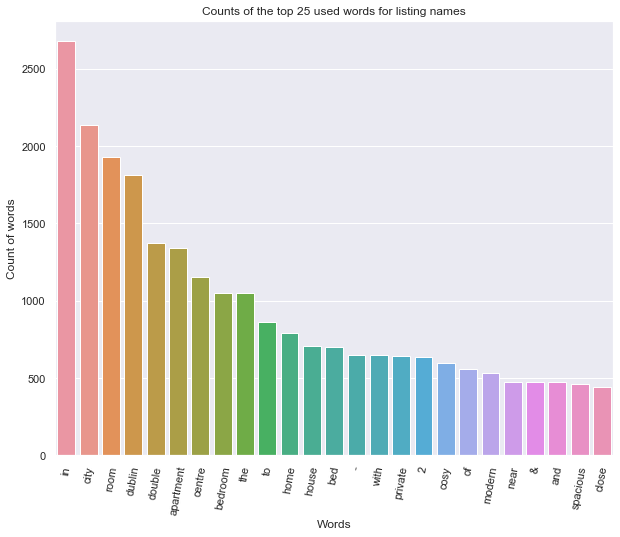

In [44]:
#we are going to use barplot for this visualization
viz_5=sns.barplot(x='Words', y='Count', data=sub_w)
viz_5.set_title('Counts of the top 25 used words for listing names')
viz_5.set_ylabel('Count of words')
viz_5.set_xlabel('Words')
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=80)

In [45]:
#let's grab 10 most reviewed listings in dublin
top_reviewed_listings=sub_6.nlargest(10,'number_of_reviews')
top_reviewed_listings

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,log_review_pm
54,Single room at Blessington Basin,2692493,Alwyn,Dublin City,53.35672,-6.27069,Private room,35,1,701,7.50,1,212,2.140066
410,City Centre Modern Townhouse,22297673,Andy,Dublin City,53.34448,-6.27208,Entire home/apt,110,1,680,10.45,2,26,2.437990
294,DUBLIN CITY CENTRE – Double Room,17501731,Kieran,Dublin City,53.33531,-6.26685,Private room,59,2,629,9.46,1,145,2.347558
170,Bed and Breakfast Near City Centre,11718729,Conj,Dublin City,53.33257,-6.27060,Private room,75,1,594,8.36,5,234,2.236445
325,Best Location in City Centre Dublin,9895249,Sabrina,Dublin City,53.34796,-6.26511,Entire home/apt,85,1,579,8.52,5,15,2.253395
44,Perfect Location City Centre Apartment,1607393,Daragh,Dublin City,53.34041,-6.27473,Entire home/apt,83,2,573,6.08,3,99,1.957274
394,Heart Of City Center Temple Bar Apt,9895249,Sabrina,Dublin City,53.34629,-6.26471,Entire home/apt,100,1,534,8.12,5,15,2.210470
2427,Spacious City Centre room and easy airport access,53525426,Dwaine,Dublin City,53.35967,-6.25905,Private room,39,1,533,12.74,1,214,2.620311
189,Stay in the heart of Temple Bar!,5225926,Jason,Dublin City,53.34443,-6.26324,Entire home/apt,115,14,507,7.00,1,235,2.079442
3518,private bedroom&bathroom verry close to airport,84520499,Niuska&George,Fingal,53.40709,-6.25157,Private room,45,1,504,15.56,1,217,2.806990


In [46]:
price_avrg=top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 74.6


In [47]:
obj_df = sub_6.select_dtypes(include=['object']).copy()

In [48]:
obj_df.head()

,name,host_name,neighbourhood,room_type
0,cosy comfortable Irish cottage twin,Teresa,Dn Laoghaire-Rathdown,Private room
1,Habitación en Dublín Double room,Don,South Dublin,Private room
2,Cosy Comfortable Irish Cottage 1 Double Bed,Teresa,Dn Laoghaire-Rathdown,Private room
3,Comfy double room in central area 1,Norah,Dublin City,Private room
4,Friendly Single Room,Margaret,Dublin City,Private room


In [49]:
int_df =sub_6.select_dtypes(include=['int64','float64']).copy()
int_df= int_df.drop(columns=['latitude','longitude','host_id','price', 'reviews_per_month'])
int_df.head()

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,log_review_pm
0,3,225,3,302,1.121678
1,1,1,1,118,0.095310
2,3,180,3,307,0.989541
3,2,110,3,26,0.712950
4,2,311,3,309,1.439835


#### Handling categorical variables 

In [50]:
le = preprocessing.LabelEncoder()

In [51]:
le.fit(obj_df["room_type"].astype(str))
list(le.classes_)

['Entire home/apt', 'Hotel room', 'Private room', 'Shared room']

In [52]:
obj_df_trf=obj_df.astype(str).apply(le.fit_transform)
obj_df_trf.head()

,name,host_name,neighbourhood,room_type
0,8624,2367,0,2
1,4552,689,3,2
2,2475,2367,0,2
3,2315,1864,1,2
4,4253,1604,1,2


In [53]:
df_final = pd.concat([int_df,obj_df_trf], axis=1)

In [54]:
df_final.head()

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,log_review_pm,name,host_name,neighbourhood,room_type
0,3,225,3,302,1.121678,8624,2367,0,2
1,1,1,1,118,0.095310,4552,689,3,2
2,3,180,3,307,0.989541,2475,2367,0,2
3,2,110,3,26,0.712950,2315,1864,1,2
4,2,311,3,309,1.439835,4253,1604,1,2


In [55]:
#split the data into train and test data
selected_df = df_final.copy()

In [56]:
selected_df.head()

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,log_review_pm,name,host_name,neighbourhood,room_type
0,3,225,3,302,1.121678,8624,2367,0,2
1,1,1,1,118,0.095310,4552,689,3,2
2,3,180,3,307,0.989541,2475,2367,0,2
3,2,110,3,26,0.712950,2315,1864,1,2
4,2,311,3,309,1.439835,4253,1604,1,2


In [57]:
#Split the dataframe into data and labels
y = selected_df.log_price #labels

AttributeError: 'DataFrame' object has no attribute 'log_price'

In [58]:
X = selected_df.iloc[:,[0,1,2,3,5,6,7,8,9]]
X.head()

IndexError: positional indexers are out-of-bounds

In [114]:
#Shape of data without labels
X.shape


(8975, 9)

In [2]:
import numpy as np

In [3]:
X = np.array([[value,1] for value in X])

NameError: name 'X' is not defined

In [115]:
import time
import datetime
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection X_train.shape,X_test.shapeon import cross_val_score

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [122]:
X_train.shape

(7180, 9)

## Linear Regression 

In [123]:
from sklearn import linear_model
lr_model = linear_model.LinearRegression()

In [124]:
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lr_model.predict(X_test)
y_pred

In [125]:
coeff_df = pd.DataFrame(lr_model.coef_.reshape(-1,1), X.columns, columns=['Coefficient'])  
coeff_df.sort_values('Coefficient',inplace=True,ascending=False)
coeff_df.style.background_gradient(cmap=sns.light_palette("Yellow", as_cmap=True))

,Coefficient
calculated_host_listings_count,0.000623
availability_365,0.000602
host_name,0.000010
name,0.000005
minimum_nights,-0.000393
number_of_reviews,-0.000601
log_review_pm,-0.046860
neighbourhood,-0.064619
room_type,-0.406201


In [169]:
my_dict = {'Actual': y_test.values.reshape(-1), 'Predicted': y_pred.reshape(-1)}
df = pd.DataFrame(my_dict)
cm = sns.light_palette("pink", as_cmap=True)
df.head().style.background_gradient(cmap=cm)

,Actual,Predicted
0,4.615121,5.072533
1,4.262680,4.536431
2,4.867534,4.891646
3,4.653960,4.841095
4,4.700480,4.709878


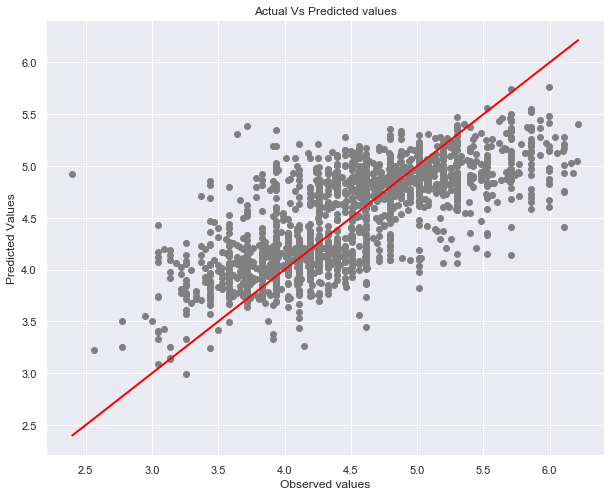

In [170]:
plt.scatter(y_test,y_pred,  color='gray')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()] ,color='red', linewidth=2)
plt.title('Actual Vs Predicted values')
plt.xlabel('Observed values')
plt.ylabel('Predicted Values')
plt.show()

In [171]:
MAE_lm = round(metrics.mean_absolute_error(y_test, y_pred)*100,2)
RMSE_lm = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))*10,2)
Accuracy_lm = round(lr_model.score(X_test,y_test)*100,2)
print('Mean Absolute Error:', MAE_lm)
print('Root Mean Squared Error:', RMSE_lm)
print('Accuracy : ', Accuracy_lm)
# cross validation
CV_lm = round(np.mean(cross_val_score(lr_model, X_train, y_train, cv=10))*100,2)
print('Crossvalidation acc:',CV_lm)

Mean Absolute Error: 33.82
Root Mean Squared Error: 4.44
Accuracy :  47.34
Crossvalidation acc: 43.28


## Random Forest Regression

In [197]:
rf = RandomForestRegressor(random_state=1,n_estimators= 500)

In [194]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=True,
                      random_state=1, verbose=0, warm_start=False)

In [195]:
y_pred = rf.predict(X_test)

In [196]:
print("Accuracy:",round(rf.score(X_test, y_test)*100,2))

Accuracy: 54.38


In [192]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy:",round(rf.score(X_test, y_test)*100,2))
CV_rf = round(np.mean(cross_val_score(rf, X_train, y_train, cv=10))*100,2)
print('Crossvalidation acc:',CV_rf)

Mean Absolute Error: 0.33570886077025613
Mean Squared Error: 0.19470463435607366
Root Mean Squared Error: 0.4412534808430112
Accuracy: 54.38
Crossvalidation acc: 51.32


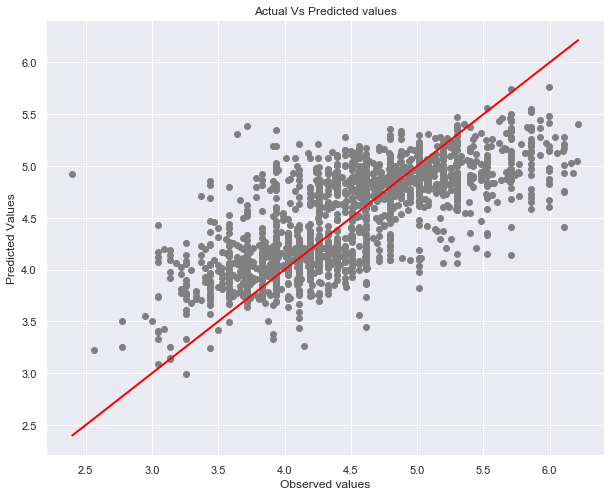

In [177]:
plt.scatter(y_test,y_pred,  color='gray')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()] ,color='red', linewidth=2)
plt.title('Actual Vs Predicted values')
plt.xlabel('Observed values')
plt.ylabel('Predicted Values')
plt.show()

In [178]:
features_df = pd.DataFrame({'Feature_Names':X_train.columns,'Feature_Importances':rf.feature_importances_})

In [186]:
cm = sns.light_palette("violet", as_cmap=True)

s = features_df.style.background_gradient(cmap=cm)
s

,Feature_Names,Feature_Importances
0,minimum_nights,0.042746
1,number_of_reviews,0.060274
2,calculated_host_listings_count,0.042715
3,availability_365,0.075411
4,log_review_pm,0.082601
5,name,0.135198
6,host_name,0.115172
7,neighbourhood,0.025060
8,room_type,0.420823


In [183]:
final_res_df = pd.DataFrame({'ML Models' : ['Random Forest Regressor','Multiple Linear Regression'],
              'Accuracy in %' : [Accuracy_rf,CV_lm],
             'MAE':[MAE_rf,MAE_lm],
             'RMSE':[RMSE_rf,RMSE_lm],
            'CV Score in %':[CV_rf,CV_lm]})

In [184]:
import seaborn as sns

cm = sns.light_palette("violet", as_cmap=True)

s = final_res_df.style.background_gradient(cmap=cm)
s

,ML Models,Accuracy in %,MAE,RMSE,CV Score in %
0,Random Forest Regressor,53.710000,33.820000,4.440000,50.910000
1,Multiple Linear Regression,43.280000,33.820000,4.440000,43.280000
